# Nasdaq_Stock_Analysis_Qasim

**1. Event Impact Analysis:**

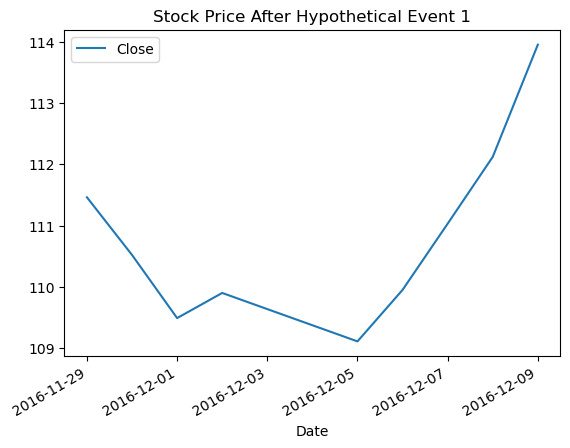

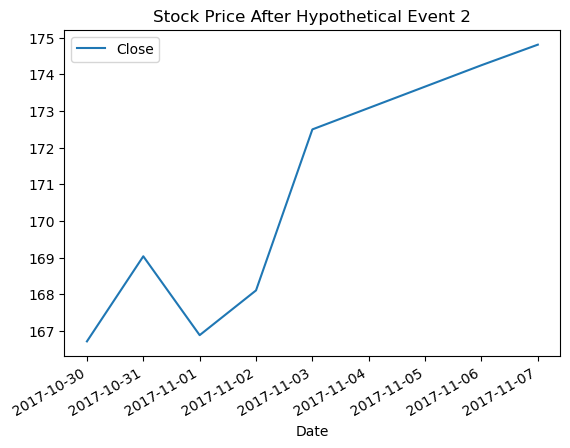

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Resources/Main.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Check for duplicate dates and handle them
duplicates = df[df.index.duplicated()]


# Drop duplicates (keeping the first occurrence)
df = df[~df.index.duplicated(keep='first')]

events = {
    'Hypothetical Event 1': '2016-11-29',
    'Hypothetical Event 2': '2017-10-29',
    # ... add other events
}

window = 10  # Consider 10 days post event

for event, date in events.items():
    mask = (df.index >= pd.to_datetime(date)) & (df.index <= pd.to_datetime(date) + pd.Timedelta(days=window))
    post_event = df[mask]
    post_event[['Close']].plot(title=f'Stock Price After {event}')
    plt.show()

**Graph 1: Stock Price After Hypothetical Event 1 (Middle East Conflict on 2016-11-29)**

Prior to the event (on 2016-11-29), the stock price appears to be relatively stable.


Immediately after the announcement of the Middle East Conflict, the stock price drops significantly over the next two days, reaching a low on 2016-12-01. This indicates that the market reacted negatively to the news, perhaps due to concerns about potential disruptions to global trade, oil supply, or geopolitical stability.


By 2016-12-03, the stock price starts to recover slightly, suggesting that initial fears might have been overblown or that the market had additional information that eased concerns.


From 2016-12-05 onwards, there's a sharp rise in the stock price, concluding at a higher level on 2016-12-09 compared to before the event. This could be due to several factors: perhaps the conflict was resolved quickly, the company announced positive news, or external market forces drove the increase.


**Graph 2: Stock Price After Hypothetical Event 2 (Chicken Pox Outbreak on 2017-10-30)**

Leading up to the Chicken Pox Outbreak on 2017-10-30, the stock price seems to be on a slight upward trend.
On the date of the event, there's a noticeable dip in the stock price, hitting its lowest point on 2017-10-31. The market likely reacted to concerns about the outbreak's impact on public health, worker productivity, or consumer behavior.


The stock starts to recover from 2017-11-01 and continues its upward trend. By 2017-11-03, the stock has not only recovered from the dip but is also trending higher than before the outbreak.


From 2017-11-04 onwards, the stock maintains its upward trajectory, ending at a considerably higher point on 2017-11-07 compared to the outbreak date. The rapid recovery suggests that the market might have perceived the outbreak's impact as temporary or that other positive factors outweighed the initial concerns.


**2. Adjusted Prices Analysis:**

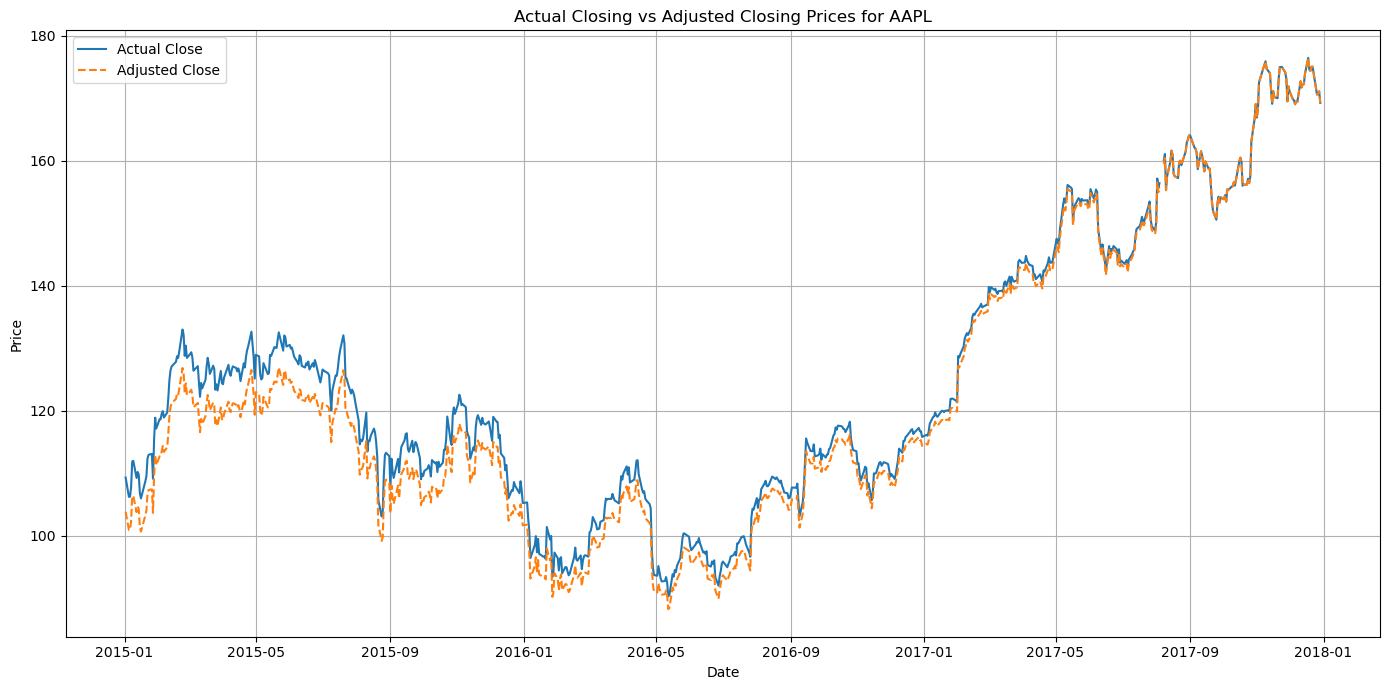

In [4]:
# Load the CSV file into a DataFrame
df = pd.read_csv('Resources/Main.csv')

# Ensure the Date column is treated as a date
df['Date'] = pd.to_datetime(df['Date'])

# Pivot the DataFrame to get stocks as columns and dates as rows for both Actual Closing and Adjusted Closing prices
close_pivot = df.pivot(index='Date', columns='Stock', values='Close')
adj_close_pivot = df.pivot(index='Date', columns='Stock', values='Adj. Close')

# Plotting
plt.figure(figsize=(14, 7))

# Choose a particular stock to compare. Let's say 'AAPL' for illustration:
stock = 'AAPL'

# Plotting both the actual close and adjusted close for the selected stock
plt.plot(close_pivot.index, close_pivot[stock], label='Actual Close')
plt.plot(adj_close_pivot.index, adj_close_pivot[stock], label='Adjusted Close', linestyle='--')

plt.title(f'Actual Closing vs Adjusted Closing Prices for {stock}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The graph depicts the Actual vs. Adjusted Closing Prices of 'AAPL' stock from early 2015 to early 2018. Key observations:

Adjusted Prices: The orange dashed line, representing adjusted closing prices, accounts for events like dividends and stock splits, providing a clearer picture of the stock's true value over time.

Divergences: When the blue (actual close) and orange (adjusted close) lines diverge, it indicates events like dividend issuances or stock splits that influenced the stock's price.

Trend: The stock faced a decline from 2015 to early 2016 but saw a significant upward trend starting in 2017, indicating growth in its value.

Stability vs. Volatility: While there were periods of price stability, such as in late 2017, noticeable fluctuations were also evident, especially during parts of 2015 and 2016.

In short, the graph gives a comprehensive view of 'AAPL' stock's performance over three years, highlighting its value changes and the impact of corporate actions.

**3. Correlation Analysis:**

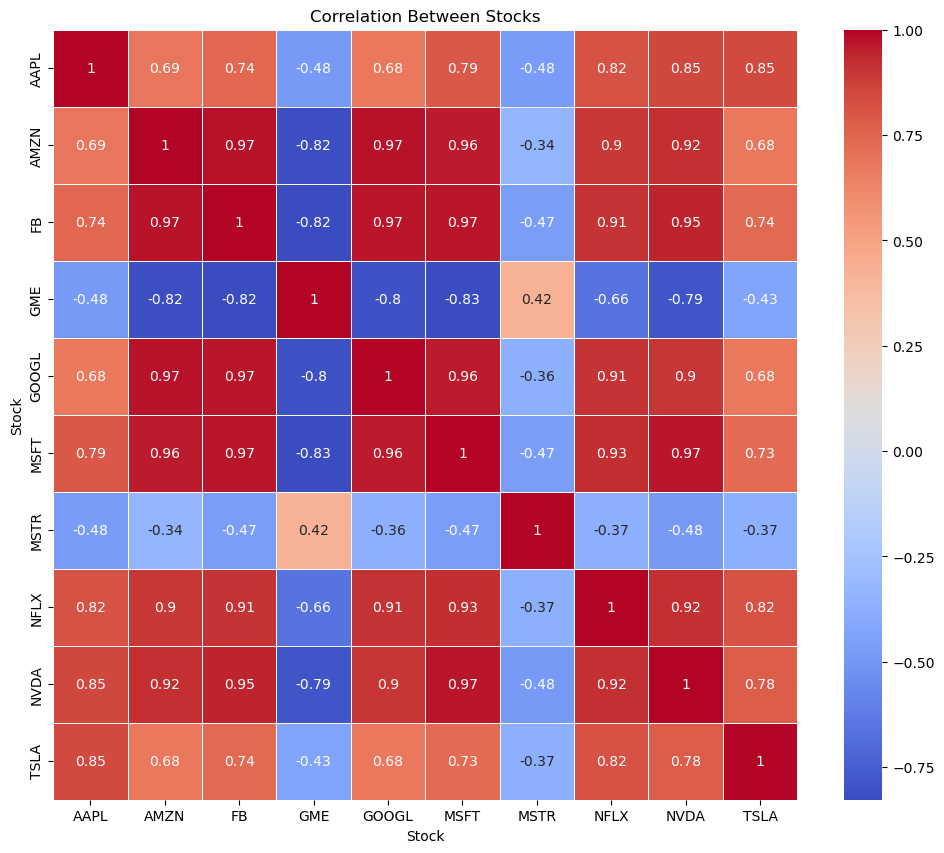

In [5]:
# Load the CSV file into a DataFrame
df = pd.read_csv('Resources/Main.csv')

# Ensure the Date column is treated as a date
df['Date'] = pd.to_datetime(df['Date'])

# Pivot the DataFrame to get stocks as columns and dates as rows based on Adjusted Closing prices
pivot_df = df.pivot(index='Date', columns='Stock', values='Adj. Close')

# Compute the correlation matrix
correlation_matrix = pivot_df.corr()

# Plot the heatmap to visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Between Stocks')
plt.show()

The heatmap visualizes the correlation coefficients between the adjusted closing prices of various stocks from the dataset. Each cell shows the degree of linear relationship between two stocks:

Color Scale: The color gradient ranges from deep blue (-0.75) to deep red (1.00). Redder shades indicate a stronger positive correlation, while bluer shades indicate a stronger negative correlation. A correlation close to 1 implies the stocks move in a similar direction, whereas close to -1 indicates they move in opposite directions.

Diagonal Line: The cells on the diagonal from the top-left to bottom-right all have a value of 1. This is because any stock is perfectly correlated with itself.

High Positive Correlation: Stocks such as AMZN and FB (0.97), or MSFT and GOOGL (0.96), have very high positive correlations, indicating they often move in tandem.

High Negative Correlation: For instance, GME and FB have a correlation of -0.82, suggesting they often move in opposite directions.

Neutral Correlation: A correlation close to 0, like MSTR and NFLX (-0.37), means there's a weak or no linear relationship between the stocks' movements.

Overall, this heatmap provides insights into how different stocks relate to each other, helping in making informed decisions, especially in portfolio diversification strategies.